In [36]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Arxivar el arxiu de dades CSV
archivo_csv = 'Input/TS_Ninja_Radio_v1_CL_5_OCT.csv'
ruta_Output = 'Output/clean_data_CL_5Oct.csv'
ruta_Output1 = 'Output/aggregate_PETROLEO.csv'

df = pd.read_csv(archivo_csv, sep=';', names=['Time', 'Direction', 'Price', 'Volume'])
print(df.head())


                          Time  Direction  Price  Volume
Datos                     Time  Direction  Price  Volume
NaN    2023-10-05T06:06:31.848       Sell  84.69     1.0
NaN    2023-10-05T06:06:31.848       Sell  84.69     1.0
NaN    2023-10-05T06:06:31.848       Sell  84.69     1.0
NaN    2023-10-05T06:06:58.496        Buy  84.69     1.0


In [37]:
df = df.reset_index(drop=True)
df = df.drop(0)
df.head()

,Time,Direction,Price,Volume
1,2023-10-05T06:06:31.848,Sell,84.69,1.0
2,2023-10-05T06:06:31.848,Sell,84.69,1.0
3,2023-10-05T06:06:31.848,Sell,84.69,1.0
4,2023-10-05T06:06:58.496,Buy,84.69,1.0
5,2023-10-05T06:06:58.496,Buy,84.7,1.0


In [38]:
df_seconds = df.copy()

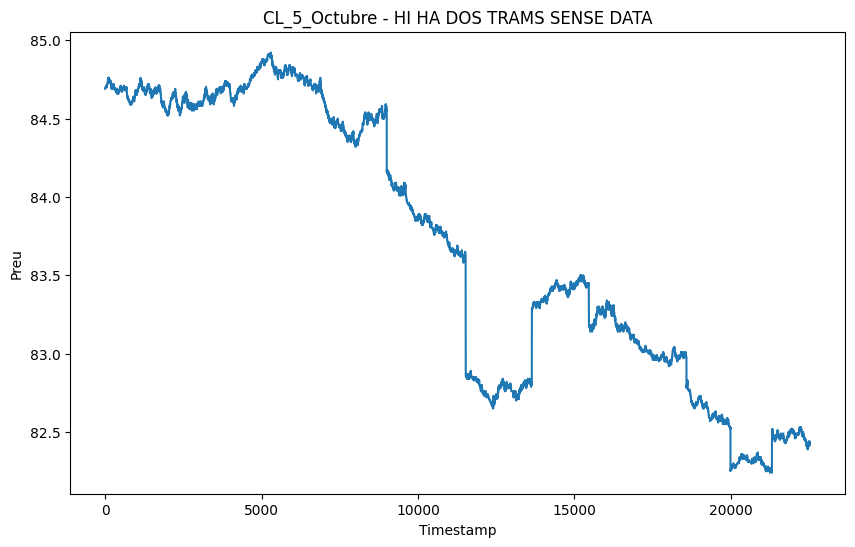

In [39]:
df['Price'] = pd.to_numeric(df['Price'])

# Crea un Gràfic de la serie 'Price'
plt.figure(figsize=(10, 6))
plt.plot(df['Price'])
plt.title('CL_5_Octubre - HI HA DOS TRAMS SENSE DATA')
plt.xlabel('Timestamp')
plt.ylabel('Preu')
plt.show()

In [40]:
df = df.sort_values(by='Time')

# # Tasa de canvi temporal, temps files

In [41]:
#TASA DE CANVI TEMPORAL, DIFERENCIA DE TEMPS ENTRE FILES CONSECUTIVES
df['Time'] = pd.to_datetime(df['Time'])
df['Time_Difference'] = df['Time'].diff()
df['Row_Speed'] = df['Time_Difference'] / df['Time_Difference'].shift()

In [42]:

# Format columna Time_Diference
df['Time_Difference'] = df['Time_Difference'].fillna(pd.Timedelta(seconds=0))  # RNaN a 0 segundos
df['Time_Difference'] = df['Time_Difference'].apply(lambda x: f"{int(x.total_seconds())} seconds {int(x.microseconds / 1000)} milliseconds")

In [43]:
df.head(40)

,Time,Direction,Price,Volume,Time_Difference,Row_Speed
1,2023-10-05 06:06:31.848,Sell,84.69,1.0,0 seconds 0 milliseconds,NaN
2,2023-10-05 06:06:31.848,Sell,84.69,1.0,0 seconds 0 milliseconds,NaN
3,2023-10-05 06:06:31.848,Sell,84.69,1.0,0 seconds 0 milliseconds,NaN
4,2023-10-05 06:06:58.496,Buy,84.69,1.0,26 seconds 648 milliseconds,inf
5,2023-10-05 06:06:58.496,Buy,84.70,1.0,0 seconds 0 milliseconds,0.000000
6,2023-10-05 06:06:58.496,Buy,84.70,1.0,0 seconds 0 milliseconds,NaN
7,2023-10-05 06:06:58.500,Buy,84.70,1.0,0 seconds 4 milliseconds,inf
8,2023-10-05 06:06:58.504,Buy,84.70,1.0,0 seconds 4 milliseconds,1.000000
9,2023-10-05 06:06:58.520,Sell,84.70,1.0,0 seconds 16 milliseconds,4.000000
10,2023-10-05 06:07:01.856,Buy,84.70,1.0,3 seconds 336 milliseconds,208.500000


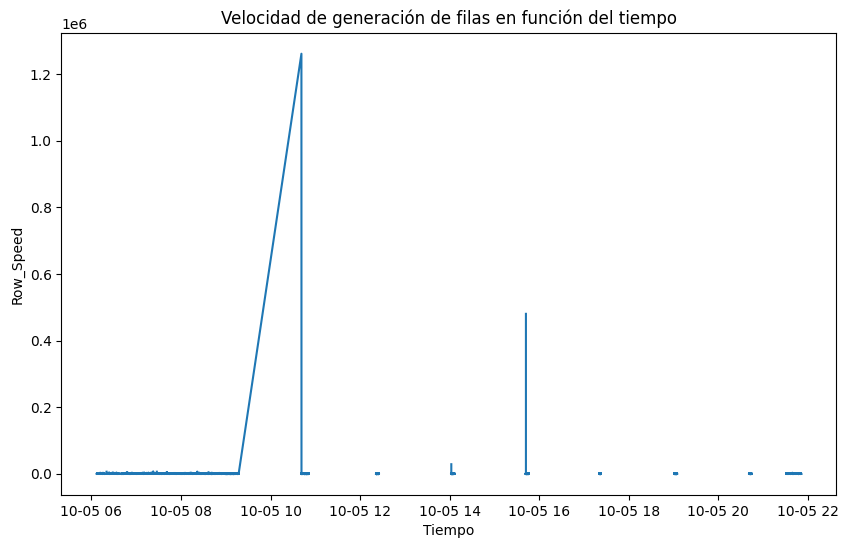

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Row_Speed'])
plt.title('Velocidad de generación de filas en función del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Row_Speed')
plt.show()


# Velocitat en funcióde files per segon (sense tenir en compte el volum)


In [50]:
df_seconds['Volume'] = pd.to_numeric(df_seconds['Volume'], errors='coerce')
df_seconds.head(10)

,Time,Direction,Price,Volume
1,2023-10-05T06:06:31.848,Sell,84.69,1.0
2,2023-10-05T06:06:31.848,Sell,84.69,1.0
3,2023-10-05T06:06:31.848,Sell,84.69,1.0
4,2023-10-05T06:06:58.496,Buy,84.69,1.0
5,2023-10-05T06:06:58.496,Buy,84.7,1.0
6,2023-10-05T06:06:58.496,Buy,84.7,1.0
7,2023-10-05T06:06:58.5,Buy,84.7,1.0
8,2023-10-05T06:06:58.504,Buy,84.7,1.0
9,2023-10-05T06:06:58.52,Sell,84.7,1.0
10,2023-10-05T06:07:01.856,Buy,84.7,1.0


In [81]:
# CREACIÓ DEL DATAFRAME AMB NOVES COLUMNES Y LA INFORMACIÓ AGREGADA, TEMPS DE AGREGACIÓ = 1 SEGÓN

df_aggregate = pd.DataFrame(columns=['Start_Time', 'End_Time', 'Num_Rows', 'Final_Price', 'Price_Diff', 'Cumulative_Volume', 'impulso'])

# Establim el periode per agregar
interval = pd.Timedelta(seconds=1)

# Inicialització variables
start_time = df['Time'].iloc[0]
end_time = start_time + interval
cumulative_volume = 0
num_rows = 0  # contador per al nombre de files

# Recorrer el df 
for index, row in df.iterrows():
    if row['Time'] >= end_time:
        # Conversió de data
        price1 = float(df['Price'].iloc[index - 1])
        price2 = float(df['Price'].iloc[index - 2])
        
        # Calcular la diferencia de preu entre Start_Time i End_Time
        price_diff = price1 - price2

        # Agregar los resultados al DataFrame df_aggregate
        df_aggregate = df_aggregate.append({
            'Start_Time': start_time,
            'End_Time': end_time,
            'Num_Rows': num_rows,  
            'Final_Price': price1,  # Preu al final del periode
            'Price_Diff': price_diff,
            'Cumulative_Volume': cumulative_volume
        }, ignore_index=True)
        
        # Restablir contadors
        cumulative_volume = 0
        num_rows = 0
        start_time = row['Time']
        end_time = start_time + interval
    else:
        num_rows += 1  # Incrementar el contador para 'Num_Rows'
        # Conversió de data
        cumulative_volume += pd.to_numeric(row['Volume'], errors='coerce')

# DETECCIÓ DEL DESPLAÇAMENT DEL PREU  CADA 5 PERIODES
df_aggregate['impulso'] = df_aggregate['Final_Price'].diff(periods=5)

print('AGREGACIONS DEL PREU PER NOMBRE DE FILES, DIFERENCIA PREU, Y VOLUM')
df_aggregate.tail()

AGREGACIONS DEL PREU PER NOMBRE DE FILES, DIFERENCIA PREU, Y VOLUM


,Start_Time,End_Time,Num_Rows,Final_Price,Price_Diff,Cumulative_Volume,impulso
3277,2023-10-05 21:50:49.356,2023-10-05 21:50:50.356,4,82.44,0.01,4.0,0.03
3278,2023-10-05 21:50:53.676,2023-10-05 21:50:54.676,0,82.43,-0.01,0.0,0.01
3279,2023-10-05 21:50:56.552,2023-10-05 21:50:57.552,2,82.42,-0.01,2.0,-0.01
3280,2023-10-05 21:50:57.660,2023-10-05 21:50:58.660,23,82.43,0.00,27.0,0.00
3281,2023-10-05 21:51:03.876,2023-10-05 21:51:04.876,1,82.44,0.01,1.0,0.01


In [85]:
# CREACIÓ D'UNA MITJA PER AVALUAR ELS IMPULSOS O DIFERÈNCIES EN EL PREU
df_aggregate['impulso_rolling'] = df_aggregate['impulso'].rolling(window=40).mean()

# CREACIÓ D'UN RATI PER AVALUAR EL NÚMERO DE FILES EN RELACIÓ AL DESPLAÇAMENT 
#INICIALMENT HE CALCULAT EL RATI EN FUNCIÓ DEL IMPULS, PERÒ FUNCIONA MILLOR AMB EL IMPULSO_ROLLING, AL MENYS 30 0 40 PERIODES
df_aggregate['ratio'] = df_aggregate['Num_Rows'] / df_aggregate['impulso_rolling'].where(df_aggregate['impulso_rolling'] != 0, other=1)
df_aggregate['ratio'] = df_aggregate['ratio'].abs()

# Mostrar las primeras filas del DataFrame
print('DataFrame con el promedio móvil de 10 períodos de "impulso":')
df_aggregate.tail()

DataFrame con el promedio móvil de 10 períodos de "impulso":


,Start_Time,End_Time,Num_Rows,Final_Price,Price_Diff,Cumulative_Volume,impulso,impulso_rolling,ratio
3277,2023-10-05 21:50:49.356,2023-10-05 21:50:50.356,4,82.44,0.01,4.0,0.03,-0.00500,800.0
3278,2023-10-05 21:50:53.676,2023-10-05 21:50:54.676,0,82.43,-0.01,0.0,0.01,-0.00400,0.0
3279,2023-10-05 21:50:56.552,2023-10-05 21:50:57.552,2,82.42,-0.01,2.0,-0.01,-0.00400,500.0
3280,2023-10-05 21:50:57.660,2023-10-05 21:50:58.660,23,82.43,0.00,27.0,0.00,-0.00375,6133.333333
3281,2023-10-05 21:51:03.876,2023-10-05 21:51:04.876,1,82.44,0.01,1.0,0.01,-0.00350,285.714286


# Conclusions

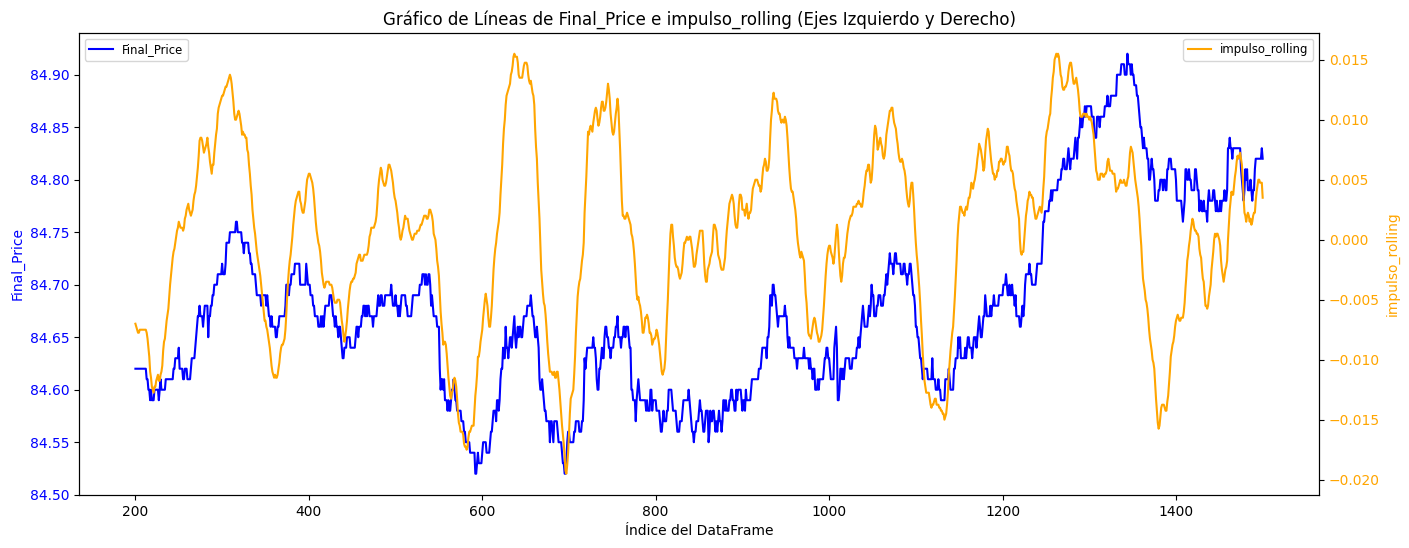

In [101]:
# MÉTODE 1: COMPARACIÓ DEL PREU CONTRA VARIACIONS DELS IMPULSOS, AQUEST MÈTODE NO FA SERVIR NI VOLUM NI ACCELERACIÓ DEL NÚM DE FILES
# CREACIÓ SUBSEGMENT
# Limitar el DataFrame a las filas de la posición 200 a 1500
df_segment = df_aggregate.iloc[200:1501]

# Crear una figura y ejes
fig, ax1 = plt.subplots(figsize=(16, 6))

# Trazar 'Final_Price' en el primer eje Y (eje izquierdo)
ax1.plot(df_segment.index, df_segment['Final_Price'], color='blue', label='Final_Price', linestyle='-')
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Final_Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Gráfico de Líneas de Final_Price e impulso_rolling (Ejes Izquierdo y Derecho)')

# Crear un segundo eje Y para 'impulso_rolling' (eje derecho)
ax2 = ax1.twinx()
ax2.plot(df_segment.index, df_segment['impulso_rolling'], color='orange', label='impulso_rolling', linestyle='-')
ax2.set_ylabel('impulso_rolling', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Añadir leyendas
ax1.legend(loc='upper left', fontsize='small')
ax2.legend(loc='upper right', fontsize='small')

# Mostrar el gráfico
plt.show()

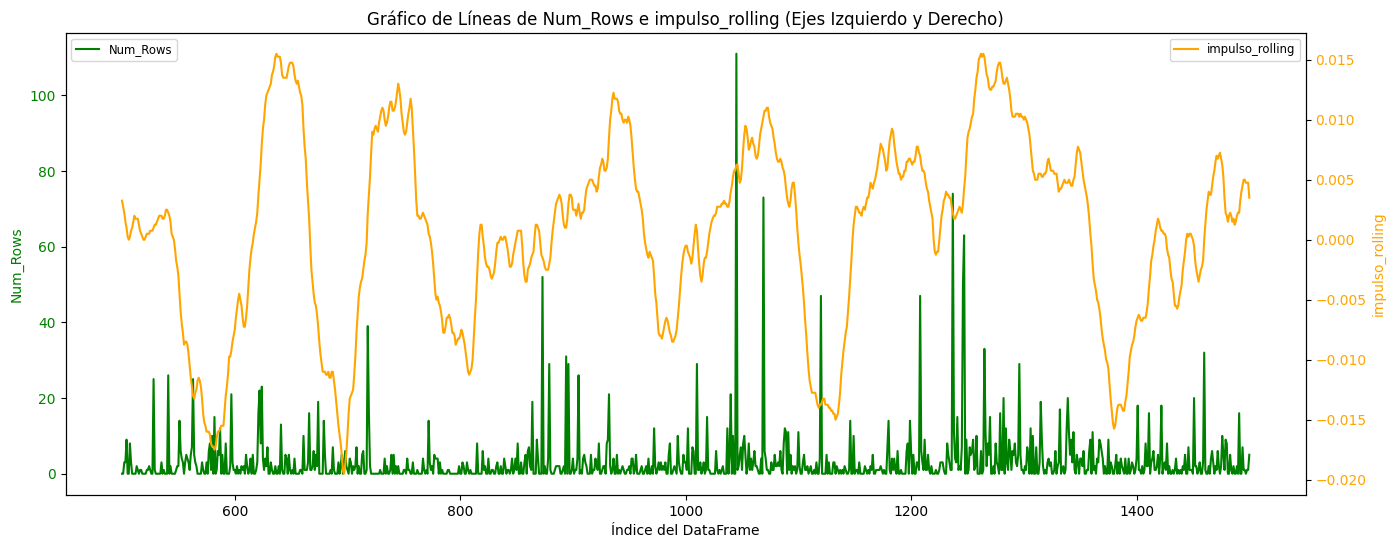

In [102]:
# MÈTODE 2:  COMPARACIÓ DEL IMPULSOS (MITJA DE VARIACIONS EN EL PREU EN RELACIÓ A LA VELOCITAT DE LA CINTA)
# Limitar el DataFrame a las filas de la posición 200 a 1500
df_segment = df_aggregate.iloc[500:1501]

# Crear una figura y ejes
fig, ax1 = plt.subplots(figsize=(16, 6))

# Trazar 'Num_Rows' en el primer eje Y (eje izquierdo)
ax1.plot(df_segment.index, df_segment['Num_Rows'], color='green', label='Num_Rows', linestyle='-')
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Num_Rows', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_title('Gráfico de Líneas de Num_Rows e impulso_rolling (Ejes Izquierdo y Derecho)')

# Crear un segundo eje Y para 'impulso_rolling' (eje derecho)
ax2 = ax1.twinx()
ax2.plot(df_segment.index, df_segment['impulso_rolling'], color='orange', label='impulso_rolling', linestyle='-')
ax2.set_ylabel('impulso_rolling', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Añadir leyendas
ax1.legend(loc='upper left', fontsize='small')
ax2.legend(loc='upper right', fontsize='small')

# Mostrar el gráfico
plt.show()
#ESTE GRÁFICO ES MUY EXPLÍCITO, DA UNA IDEA DE LA ABSORCIÓN

# CONCLUSIÓ FINAL: CONSTRUCCIÓ D'UN INDICADOR ESFORÇ RESULTAT 

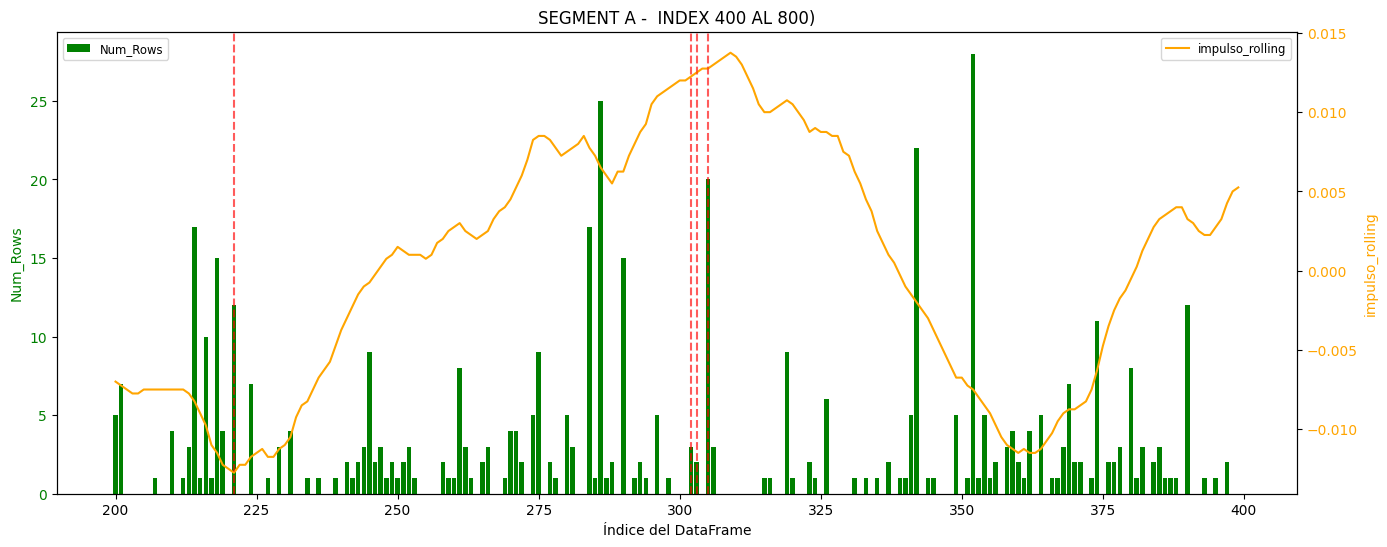

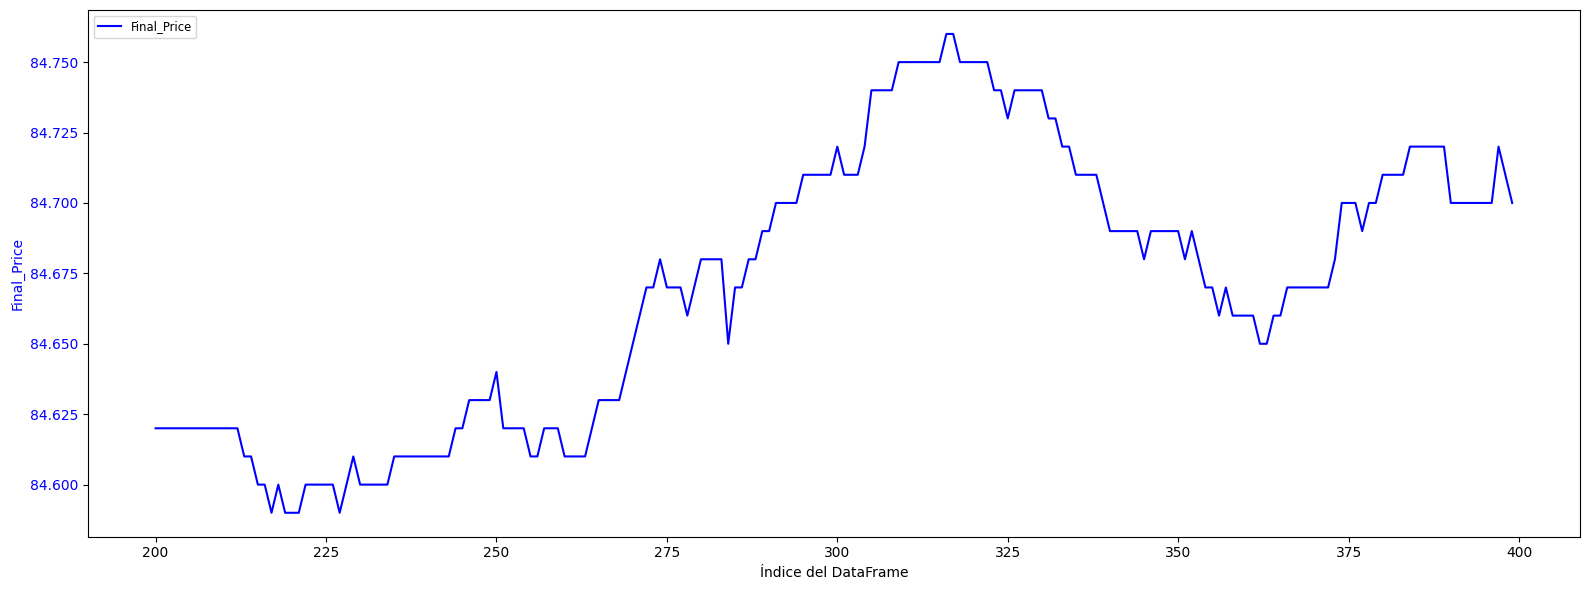

In [156]:
# INDEX DESDE 200 AL 400
import numpy as np

# Limitar el DataFrame a 200 a 400
df_segment = df_aggregate.iloc[200:400]

# gráfico (Num_Rows e impulso_rolling)
fig, ax1 = plt.subplots(figsize=(16, 6))

# Trazar 'Num_Rows' en el primer eje Y (eje izquierdo) como un gráfico de barras en color verde
ax1.bar(df_segment.index, df_segment['Num_Rows'], color='green', label='Num_Rows')
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Num_Rows', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_title('SEGMENT A -  INDEX 400 AL 800')

# Crear un segundo eje Y para 'impulso_rolling' (eje derecho)
ax2 = ax1.twinx()
ax2.plot(df_segment.index, df_segment['impulso_rolling'], color='orange', label='impulso_rolling', linestyle='-')
ax2.set_ylabel('impulso_rolling', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Añadir leyendas para el primer gráfico
ax1.legend(loc='upper left', fontsize='small')
ax2.legend(loc='upper right', fontsize='small')

# Crear un segundo gráfico debajo del primero para 'Final_Price' en color azul
fig, ax3 = plt.subplots(figsize=(16, 6))
ax3.plot(df_segment.index, df_segment['Final_Price'], color='blue', label='Final_Price', linestyle='-')
ax3.set_xlabel('Índice del DataFrame')
ax3.set_ylabel('Final_Price', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.legend(loc='upper left', fontsize='small')

# Identificar los puntos donde Num_Rows es superior a la media y la variación de impulso_rolling es mayor o igual a 0.012
condition = (df_segment['Num_Rows'] > df_segment['Num_Rows'].rolling(window=5).mean()) & (np.abs(df_segment['impulso_rolling']) >= 0.012)
vertical_lines = df_segment.index[condition]

# Agregar líneas verticales de color rojo en los puntos identificados
for line in vertical_lines:
    ax1.axvline(x=line, color='r', linestyle='--', alpha=0.4)
    ax2.axvline(x=line, color='r', linestyle='--', alpha=0.4)

# Mostrar los dos gráficos
plt.tight_layout()
plt.show()

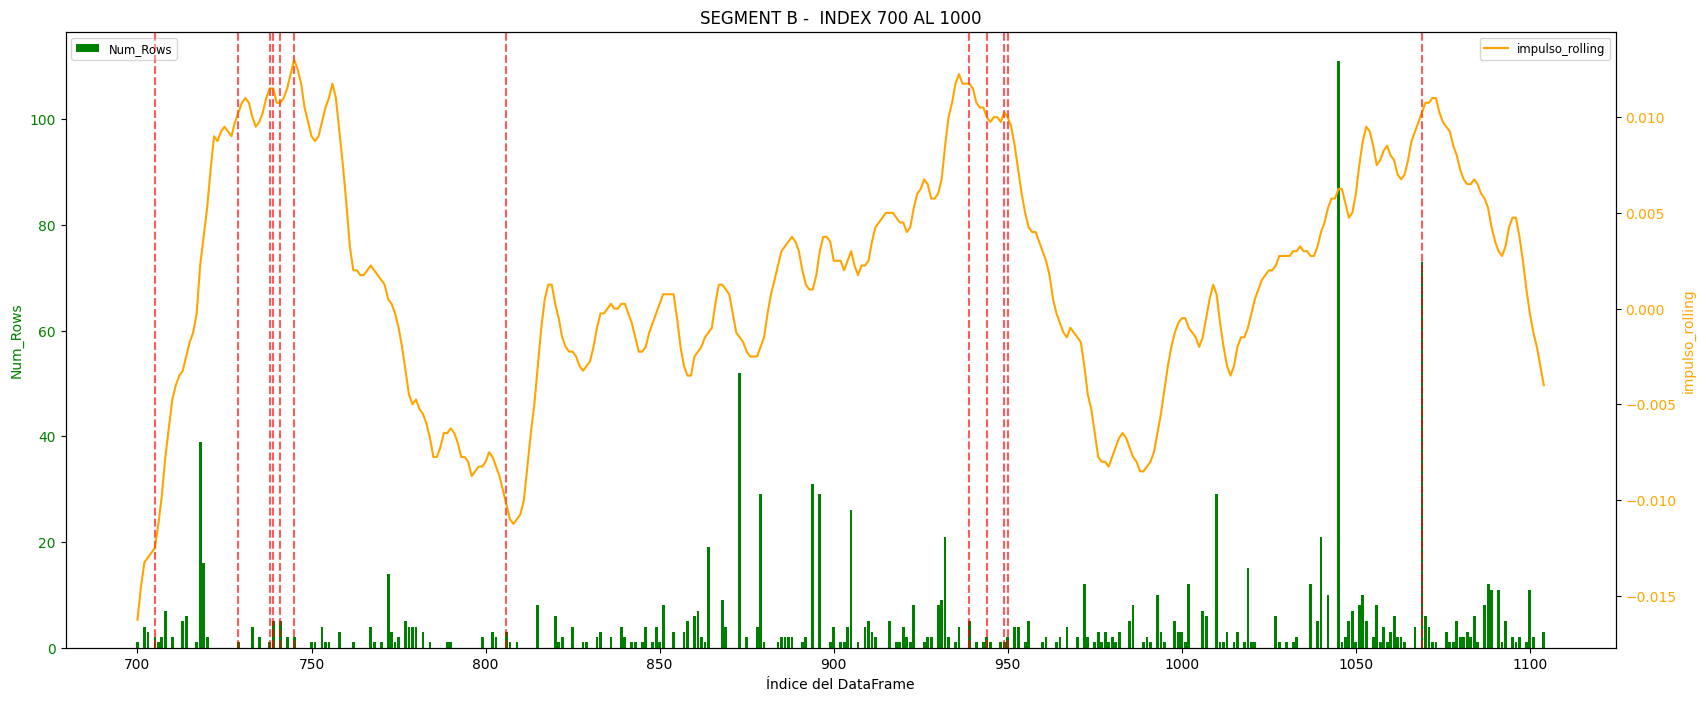

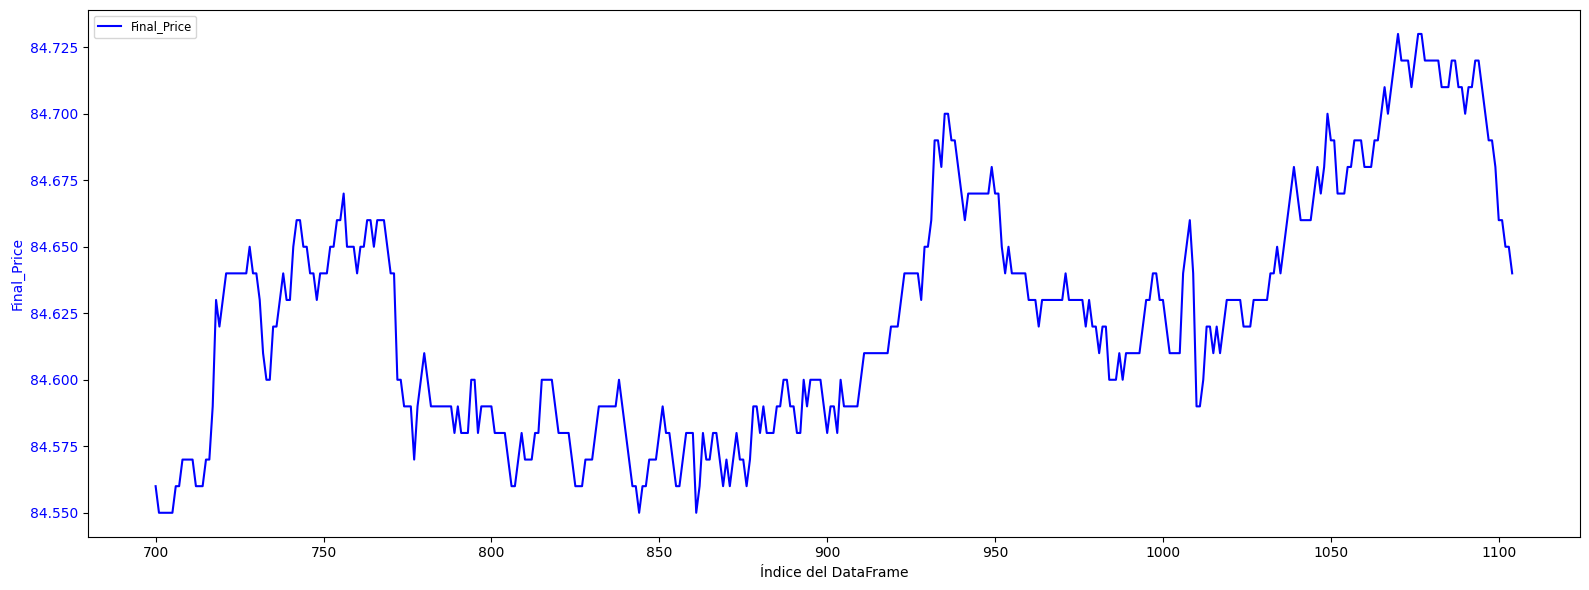

In [165]:
#  INDEX DESDE 700 AL 1000
import numpy as np

# Limitar el DataFrame 
df_segment = df_aggregate.iloc[700:1105]

# gráfico (Num_Rows e impulso_rolling)
fig, ax1 = plt.subplots(figsize=(20, 8))

# Trazar 'Num_Rows' en el primer eje Y (eje izquierdo) como un gráfico de barras en color verde
ax1.bar(df_segment.index, df_segment['Num_Rows'], color='green', label='Num_Rows')
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Num_Rows', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_title('SEGMENT B -  INDEX 700 AL 1000')

# Crear un segundo eje Y para 'impulso_rolling' (eje derecho)
ax2 = ax1.twinx()
ax2.plot(df_segment.index, df_segment['impulso_rolling'], color='orange', label='impulso_rolling', linestyle='-')
ax2.set_ylabel('impulso_rolling', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Añadir leyendas para el primer gráfico
ax1.legend(loc='upper left', fontsize='small')
ax2.legend(loc='upper right', fontsize='small')

# Crear un segundo gráfico debajo del primero para 'Final_Price' en color azul
fig, ax3 = plt.subplots(figsize=(16,6))
ax3.plot(df_segment.index, df_segment['Final_Price'], color='blue', label='Final_Price', linestyle='-')
ax3.set_xlabel('Índice del DataFrame')
ax3.set_ylabel('Final_Price', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.legend(loc='upper left', fontsize='small')

# Identificar los puntos donde Num_Rows es superior a la media y la variación de impulso_rolling es mayor o igual a 0.012
condition = (df_segment['Num_Rows'] > df_segment['Num_Rows'].rolling(window=5).mean()) & (np.abs(df_segment['impulso_rolling']) >= 0.01)
vertical_lines = df_segment.index[condition]

# Agregar líneas verticales de color rojo en los puntos identificados
for line in vertical_lines:
    ax1.axvline(x=line, color='r', linestyle='--', alpha=0.4)
    ax2.axvline(x=line, color='r', linestyle='--', alpha=0.4)

# Mostrar los dos gráficos
plt.tight_layout()
plt.show()

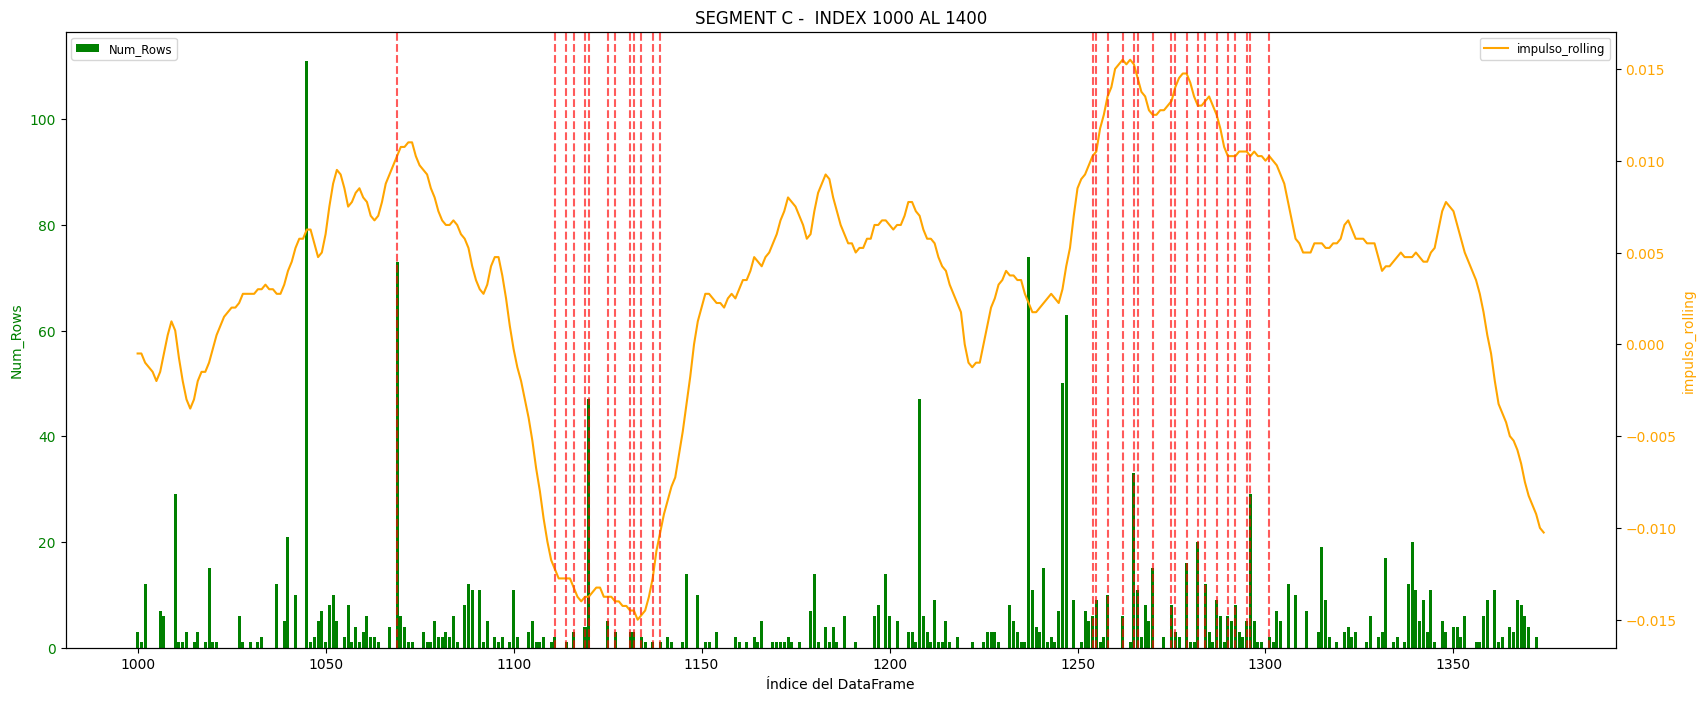

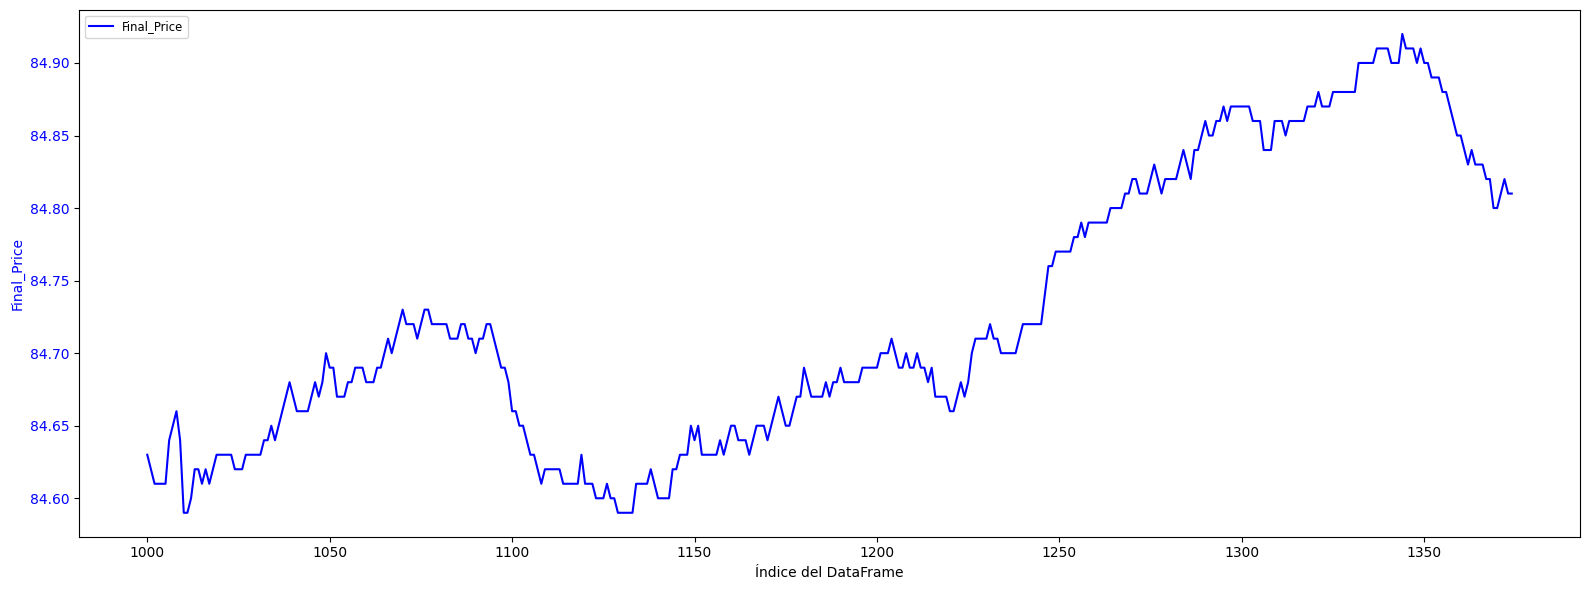

In [172]:
#  INDEX DESDE 1000 AL 1300
import numpy as np

# Limitar el DataFrame 
df_segment = df_aggregate.iloc[1000:1375]

# gráfico (Num_Rows e impulso_rolling)
fig, ax1 = plt.subplots(figsize=(20, 8))

# Trazar 'Num_Rows' en el primer eje Y (eje izquierdo) como un gráfico de barras en color verde
ax1.bar(df_segment.index, df_segment['Num_Rows'], color='green', label='Num_Rows')
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Num_Rows', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_title('SEGMENT C -  INDEX 1000 AL 1400')

# Crear un segundo eje Y para 'impulso_rolling' (eje derecho)
ax2 = ax1.twinx()
ax2.plot(df_segment.index, df_segment['impulso_rolling'], color='orange', label='impulso_rolling', linestyle='-')
ax2.set_ylabel('impulso_rolling', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Añadir leyendas para el primer gráfico
ax1.legend(loc='upper left', fontsize='small')
ax2.legend(loc='upper right', fontsize='small')

# Crear un segundo gráfico debajo del primero para 'Final_Price' en color azul
fig, ax3 = plt.subplots(figsize=(16,6))
ax3.plot(df_segment.index, df_segment['Final_Price'], color='blue', label='Final_Price', linestyle='-')
ax3.set_xlabel('Índice del DataFrame')
ax3.set_ylabel('Final_Price', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.legend(loc='upper left', fontsize='small')

# Identificar los puntos donde Num_Rows es superior a la media y la variación de impulso_rolling es mayor o igual a 0.012
condition = (df_segment['Num_Rows'] > df_segment['Num_Rows'].rolling(window=5).mean()) & (np.abs(df_segment['impulso_rolling']) >= 0.01)
vertical_lines = df_segment.index[condition]

# Agregar líneas verticales de color rojo en los puntos identificados
for line in vertical_lines:
    ax1.axvline(x=line, color='r', linestyle='--', alpha=0.4)
    ax2.axvline(x=line, color='r', linestyle='--', alpha=0.4)

# Mostrar los dos gráficos
plt.tight_layout()
plt.show()

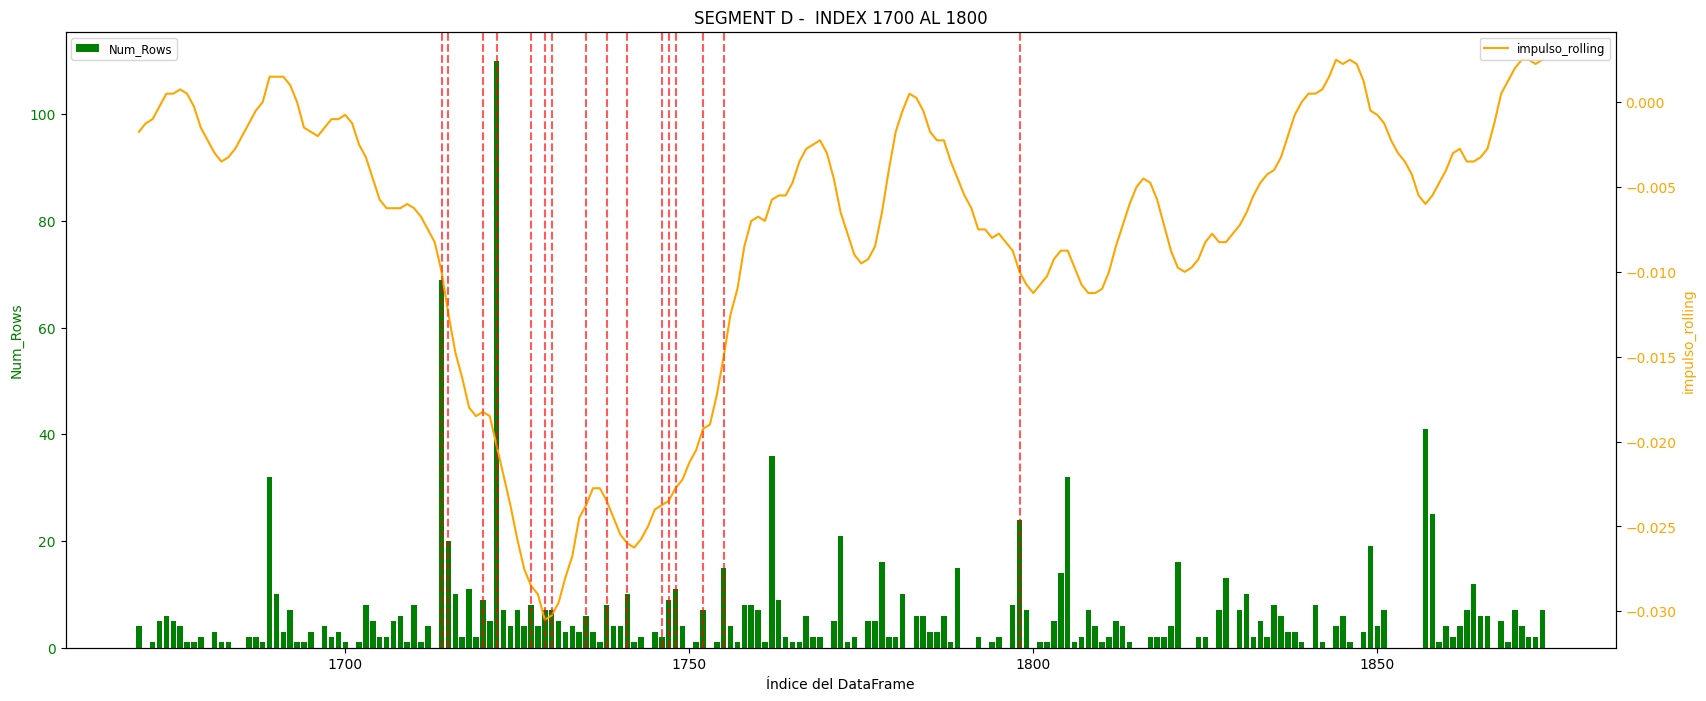

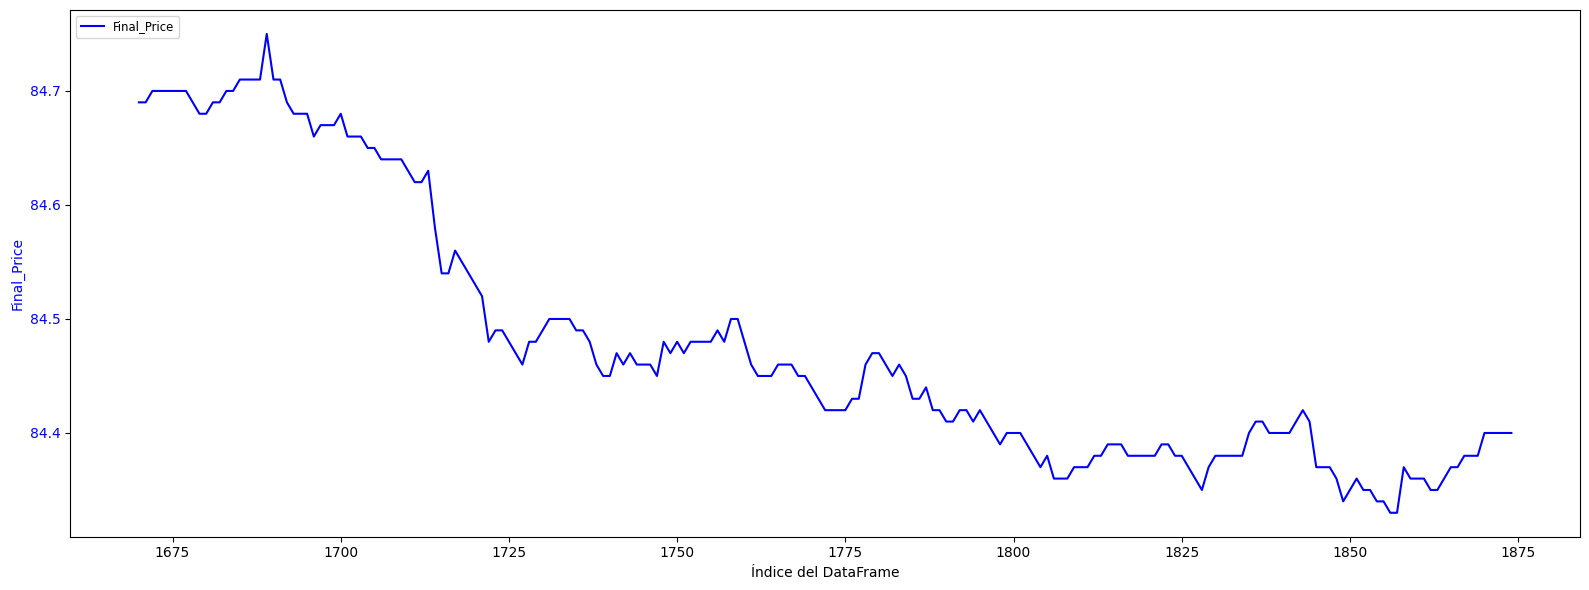

In [179]:
#  INDEX DESDE 1500 a 1800
import numpy as np

# Limitar el DataFrame 
df_segment = df_aggregate.iloc[1670:1875]

# gráfico (Num_Rows e impulso_rolling)
fig, ax1 = plt.subplots(figsize=(20, 8))

# Trazar 'Num_Rows' en el primer eje Y (eje izquierdo) como un gráfico de barras en color verde
ax1.bar(df_segment.index, df_segment['Num_Rows'], color='green', label='Num_Rows')
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Num_Rows', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_title('SEGMENT D -  INDEX 1700 AL 1800')

# Crear un segundo eje Y para 'impulso_rolling' (eje derecho)
ax2 = ax1.twinx()
ax2.plot(df_segment.index, df_segment['impulso_rolling'], color='orange', label='impulso_rolling', linestyle='-')
ax2.set_ylabel('impulso_rolling', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Añadir leyendas para el primer gráfico
ax1.legend(loc='upper left', fontsize='small')
ax2.legend(loc='upper right', fontsize='small')

# Crear un segundo gráfico debajo del primero para 'Final_Price' en color azul
fig, ax3 = plt.subplots(figsize=(16,6))
ax3.plot(df_segment.index, df_segment['Final_Price'], color='blue', label='Final_Price', linestyle='-')
ax3.set_xlabel('Índice del DataFrame')
ax3.set_ylabel('Final_Price', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.legend(loc='upper left', fontsize='small')

# Identificar los puntos donde Num_Rows es superior a la media y la variación de impulso_rolling es mayor o igual a 0.012
condition = (df_segment['Num_Rows'] > df_segment['Num_Rows'].rolling(window=5).mean()) & (np.abs(df_segment['impulso_rolling']) >= 0.01)
vertical_lines = df_segment.index[condition]

# Agregar líneas verticales de color rojo en los puntos identificados
for line in vertical_lines:
    ax1.axvline(x=line, color='r', linestyle='--', alpha=0.4)
    ax2.axvline(x=line, color='r', linestyle='--', alpha=0.4)

# Mostrar los dos gráficos
plt.tight_layout()
plt.show()

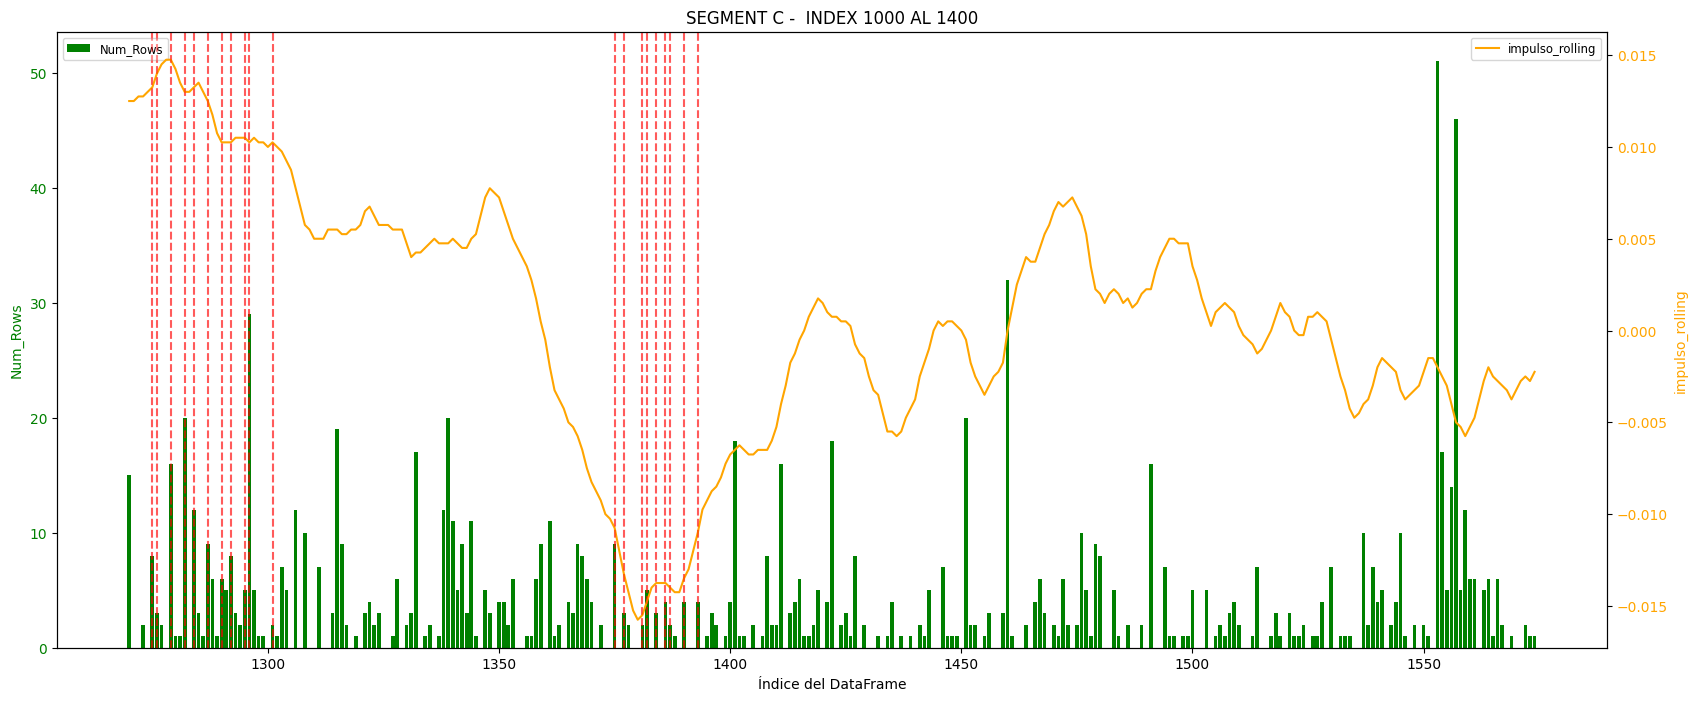

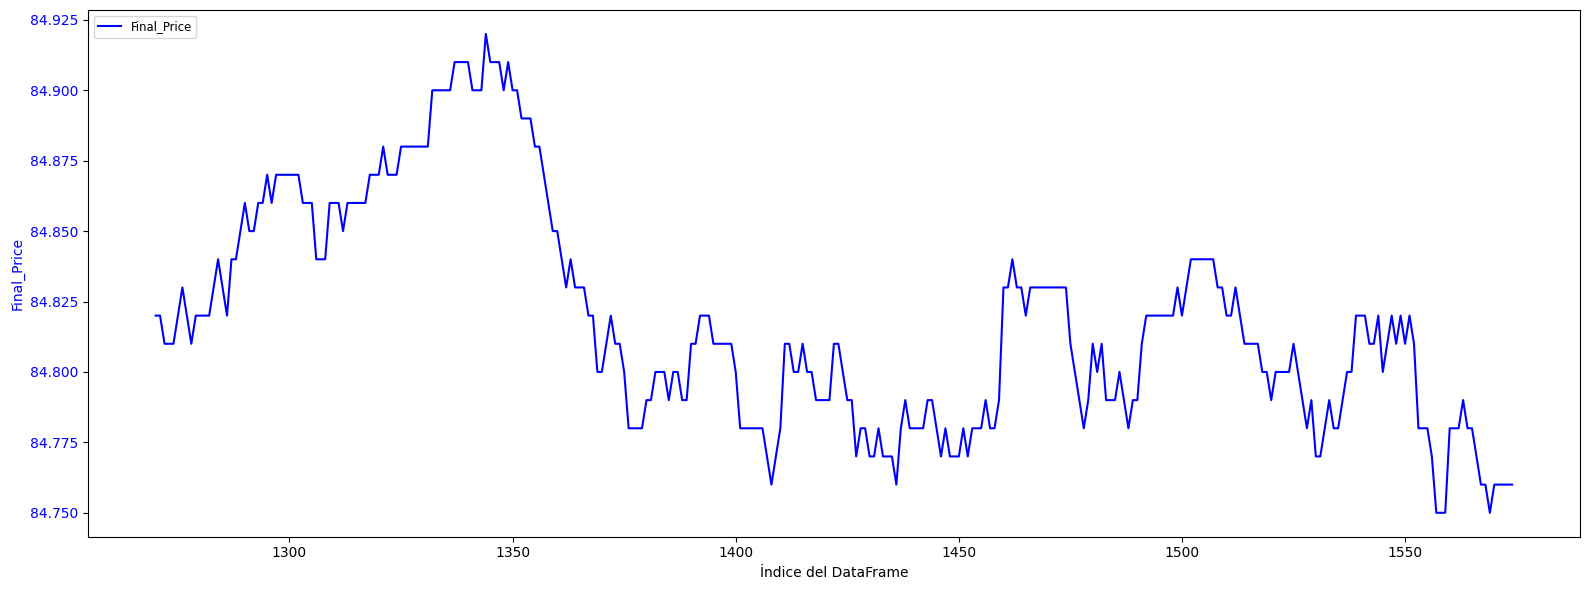

In [180]:
#  INDEX DESDE 1000 AL 1300
import numpy as np

# Limitar el DataFrame 
df_segment = df_aggregate.iloc[1270:1575]

# gráfico (Num_Rows e impulso_rolling)
fig, ax1 = plt.subplots(figsize=(20, 8))

# Trazar 'Num_Rows' en el primer eje Y (eje izquierdo) como un gráfico de barras en color verde
ax1.bar(df_segment.index, df_segment['Num_Rows'], color='green', label='Num_Rows')
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Num_Rows', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_title('SEGMENT C -  INDEX 1000 AL 1400')

# Crear un segundo eje Y para 'impulso_rolling' (eje derecho)
ax2 = ax1.twinx()
ax2.plot(df_segment.index, df_segment['impulso_rolling'], color='orange', label='impulso_rolling', linestyle='-')
ax2.set_ylabel('impulso_rolling', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Añadir leyendas para el primer gráfico
ax1.legend(loc='upper left', fontsize='small')
ax2.legend(loc='upper right', fontsize='small')

# Crear un segundo gráfico debajo del primero para 'Final_Price' en color azul
fig, ax3 = plt.subplots(figsize=(16,6))
ax3.plot(df_segment.index, df_segment['Final_Price'], color='blue', label='Final_Price', linestyle='-')
ax3.set_xlabel('Índice del DataFrame')
ax3.set_ylabel('Final_Price', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.legend(loc='upper left', fontsize='small')

# Identificar los puntos donde Num_Rows es superior a la media y la variación de impulso_rolling es mayor o igual a 0.012
condition = (df_segment['Num_Rows'] > df_segment['Num_Rows'].rolling(window=5).mean()) & (np.abs(df_segment['impulso_rolling']) >= 0.01)
vertical_lines = df_segment.index[condition]

# Agregar líneas verticales de color rojo en los puntos identificados
for line in vertical_lines:
    ax1.axvline(x=line, color='r', linestyle='--', alpha=0.4)
    ax2.axvline(x=line, color='r', linestyle='--', alpha=0.4)

# Mostrar los dos gráficos
plt.tight_layout()
plt.show()

# Alte data

In [ ]:

# gráfico (Num_Rows e impulso_rolling)
fig, ax1 = plt.subplots(figsize=(20, 8))

# Trazar 'Num_Rows' en el primer eje Y (eje izquierdo) como un gráfico de barras en color verde
ax1.bar(df_segment.index, df_segment['Num_Rows'], color='green', label='Num_Rows')
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Num_Rows', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_title('Gráfico de Barras de Num_Rows e impulso_rolling (Ejes Izquierdo y Derecho)')

# Crear un segundo eje Y para 'impulso_rolling' (eje derecho)
ax2 = ax1.twinx()
ax2.plot(df_segment.index, df_segment['impulso_rolling'], color='orange', label='impulso_rolling', linestyle='-')
ax2.set_ylabel('impulso_rolling', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Añadir leyendas para el primer gráfico
ax1.legend(loc='upper left', fontsize='small')
ax2.legend(loc='upper right', fontsize='small')

# Crear un segundo gráfico debajo del primero para 'Final_Price' en color azul
fig, ax3 = plt.subplots(figsize=(16,6))
ax3.plot(df_segment.index, df_segment['Final_Price'], color='blue', label='Final_Price', linestyle='-')
ax3.set_xlabel('Índice del DataFrame')
ax3.set_ylabel('Final_Price', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.legend(loc='upper left', fontsize='small')

# Identificar los puntos donde Num_Rows es superior a la media y la variación de impulso_rolling es mayor o igual a 0.012
condition = (df_segment['Num_Rows'] > df_segment['Num_Rows'].rolling(window=5).mean()) & (np.abs(df_segment['impulso_rolling']) >= 0.012)
vertical_lines = df_segment.index[condition]

# Agregar líneas verticales de color rojo en los puntos identificados
for line in vertical_lines:
    ax1.axvline(x=line, color='r', linestyle='--', alpha=0.4)
    ax2.axvline(x=line, color='r', linestyle='--', alpha=0.4)

# Mostrar los dos gráficos
plt.tight_layout()
plt.show()

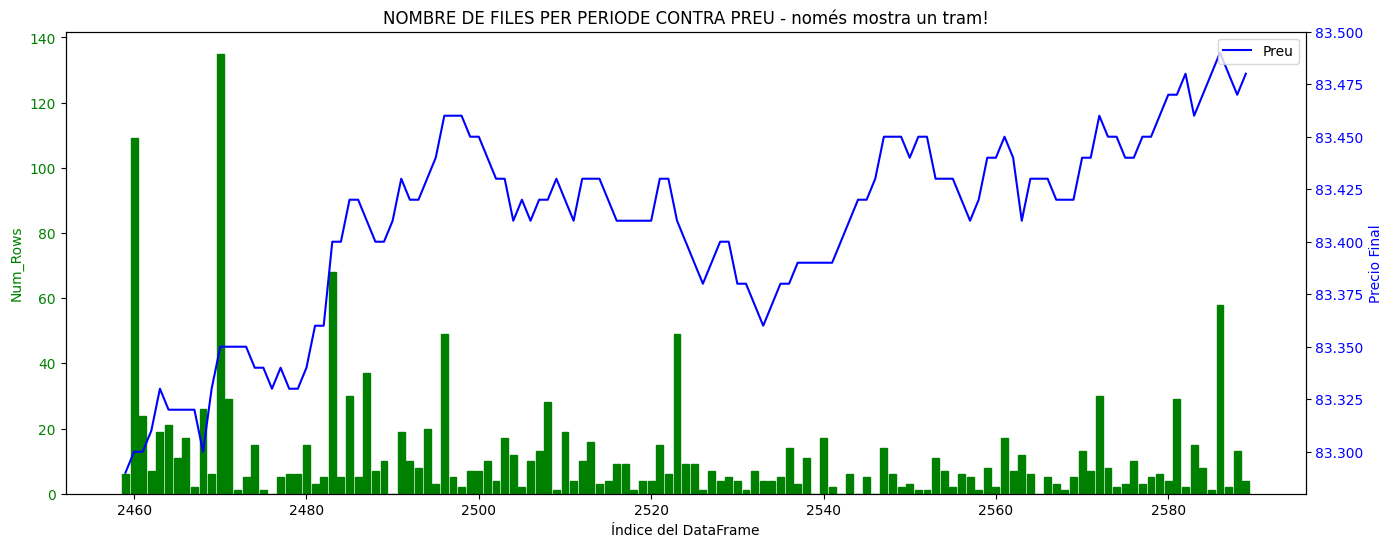

In [109]:
# MÈTODE 3:  VELOCITAT DEL TIME AND SALES CONTRA PREU (NO DIFERENCIA O VARIACIÓ DEL PREU)
# Limitar el DataFrame 
df_aggregate_600 = df_aggregate.iloc[2459:2590]


fig, ax1 = plt.subplots(figsize=(16, 6))

# Crear un gráfico de barres
ax1.bar(df_aggregate_600.index, df_aggregate_600['Num_Rows'], color='green', edgecolor='green')
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Num_Rows', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_title('NOMBRE DE FILES PER PERIODE CONTRA PREU - només mostra un tram!')

# Crear un segon eix
ax2 = ax1.twinx()
ax2.plot(df_aggregate_600.index, df_aggregate_600['Final_Price'], color='b', label='Preu')
ax2.set_ylabel('Precio Final', color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax2.legend(loc='upper right')


# Mostrar el gráfico
plt.show()

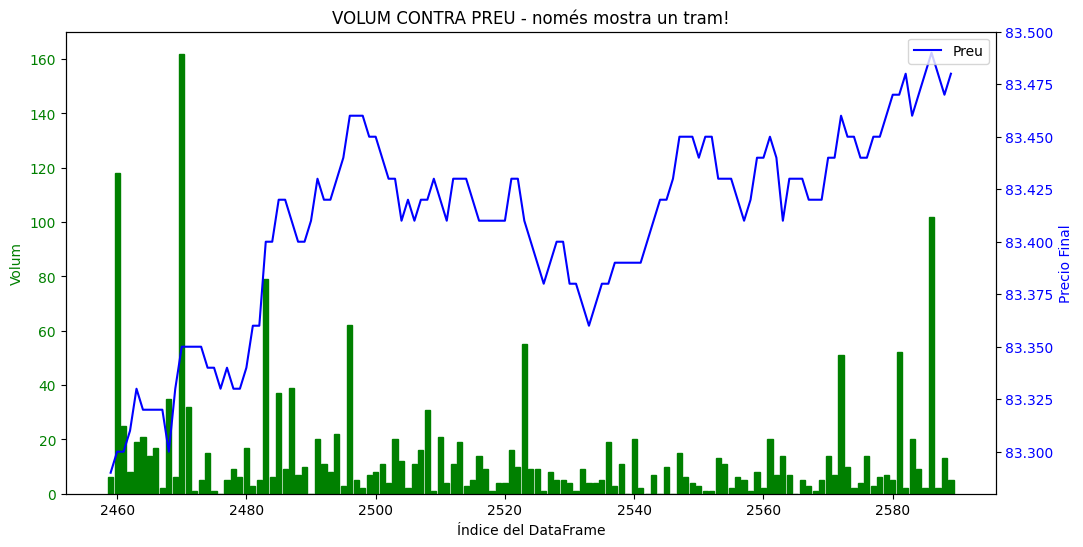

In [108]:
# MÈTODE 5: UTILITZACIÓ DEL VOLUMEN AGREGAT PER UNITAT DE TEMPS (EN EL NOSTRE CAS 1 SEGÓN) EN RELACIÓ AL PREU
# Limitar el DataFrame 
df_aggregate_600 = df_aggregate.iloc[2459:2590]


fig, ax1 = plt.subplots(figsize=(12, 6))

# Crear un gráfico de barres
ax1.bar(df_aggregate_600.index, df_aggregate_600['Cumulative_Volume'], color='green', edgecolor='green')
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Volum', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_title('VOLUM CONTRA PREU - només mostra un tram!')

# Crear un segon eix
ax2 = ax1.twinx()
ax2.plot(df_aggregate_600.index, df_aggregate_600['Final_Price'], color='b', label='Preu')
ax2.set_ylabel('Precio Final', color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax2.legend(loc='upper right')


# Mostrar el gráfico
plt.show()

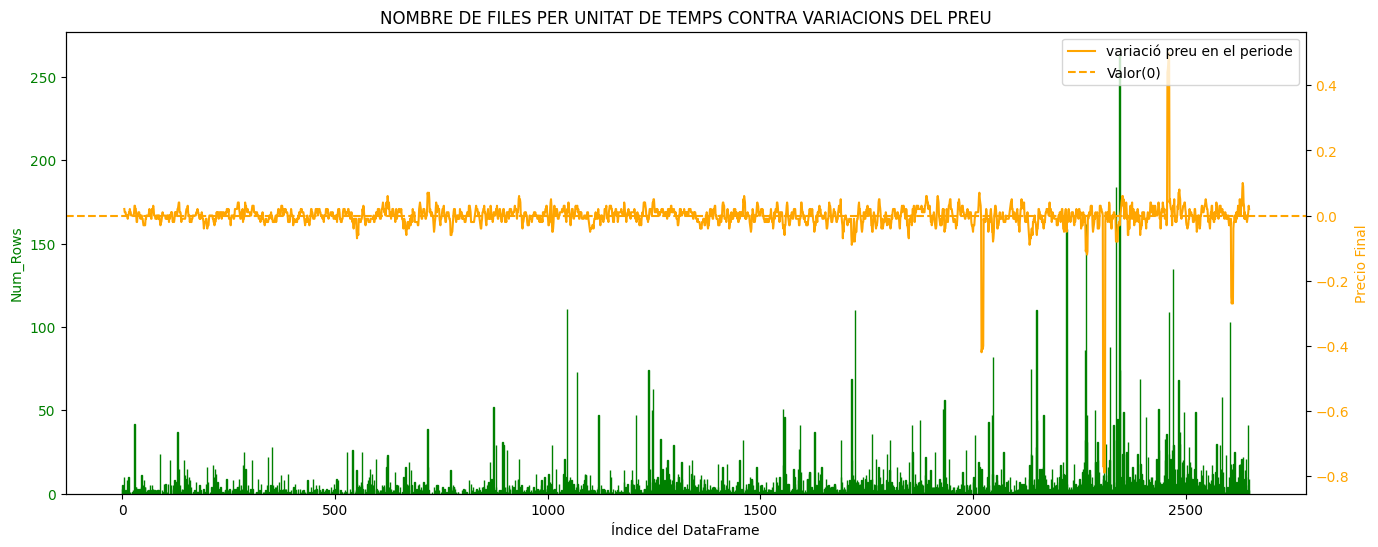

In [110]:
# Limitar el DataFrame a los primeros 600 elementos del índice
df_aggregate_600 = df_aggregate.iloc[:2650]

# Crear una figura y ejes
fig, ax1 = plt.subplots(figsize=(16, 6))

# Crear un gráfico de barras en el eje principal (eje Y izquierdo) para 'Num_Rows'
ax1.bar(df_aggregate_600.index, df_aggregate_600['Num_Rows'], color='skyblue', edgecolor='green')
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Num_Rows', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_title('NOMBRE DE FILES PER UNITAT DE TEMPS CONTRA VARIACIONS DEL PREU')

# Crear un segundo eje Y para los precios
ax2 = ax1.twinx()
ax2.plot(df_aggregate_600.index, df_aggregate_600['impulso'], color='orange', label='variació preu en el periode')
ax2.set_ylabel('Precio Final', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# valor 0
horizontal_line_value = 0  
ax2.axhline(y=horizontal_line_value, color='orange', linestyle='--', label=f'Valor({horizontal_line_value})')
ax2.legend(loc='upper right')

ax2.legend(loc='upper right')

plt.show()

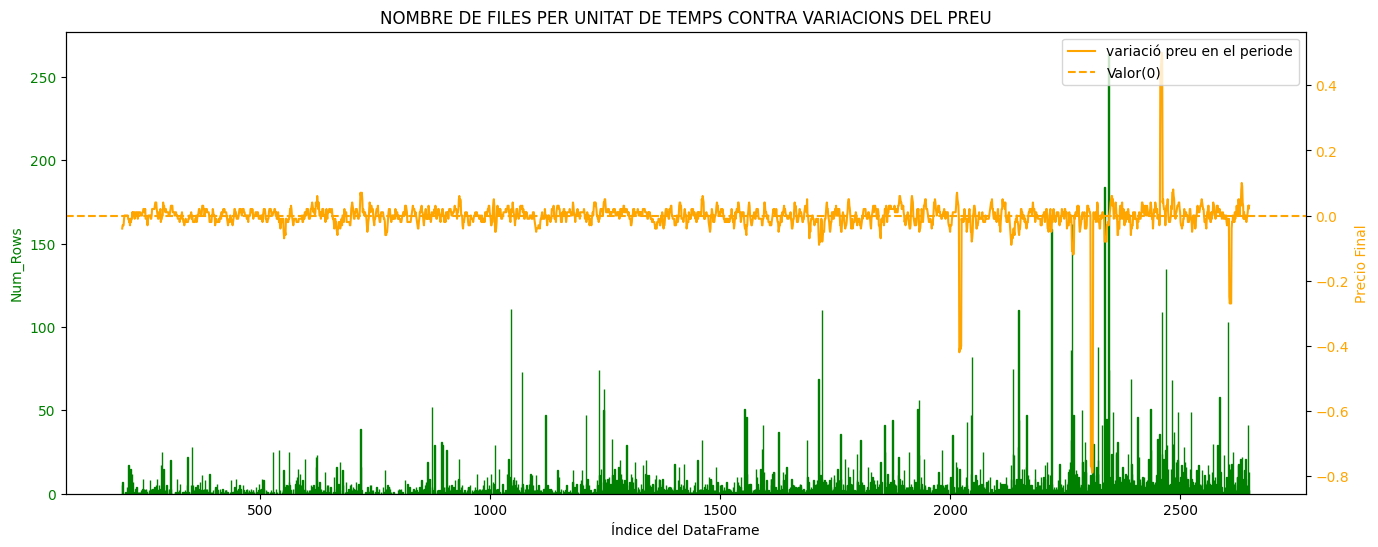

In [112]:
# MISMO CÓDIGO PERO AHORA CON EL DETALLE POR SEGMENTOS
import matplotlib.pyplot as plt

# Limitar el DataFrame a las filas del índice 800 al 1050
df_aggregate_selection = df_aggregate.iloc[200:2651]

# Crear una figura y ejes
fig, ax1 = plt.subplots(figsize=(16, 6))

# Crear un gráfico de barras en el eje principal (eje Y izquierdo) para 'Num_Rows'
ax1.bar(df_aggregate_selection.index, df_aggregate_selection['Num_Rows'], color='green', edgecolor='green')
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Num_Rows', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_title('NOMBRE DE FILES PER UNITAT DE TEMPS CONTRA VARIACIONS DEL PREU')

# Crear un segundo eje Y para los precios
ax2 = ax1.twinx()
ax2.plot(df_aggregate_selection.index, df_aggregate_selection['impulso'], color='orange', label='variació preu en el periode')
ax2.set_ylabel('Precio Final', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# valor 0
horizontal_line_value = 0  
ax2.axhline(y=horizontal_line_value, color='orange', linestyle='--', label=f'Valor({horizontal_line_value})')
ax2.legend(loc='upper right')

ax2.legend(loc='upper right')

plt.show()


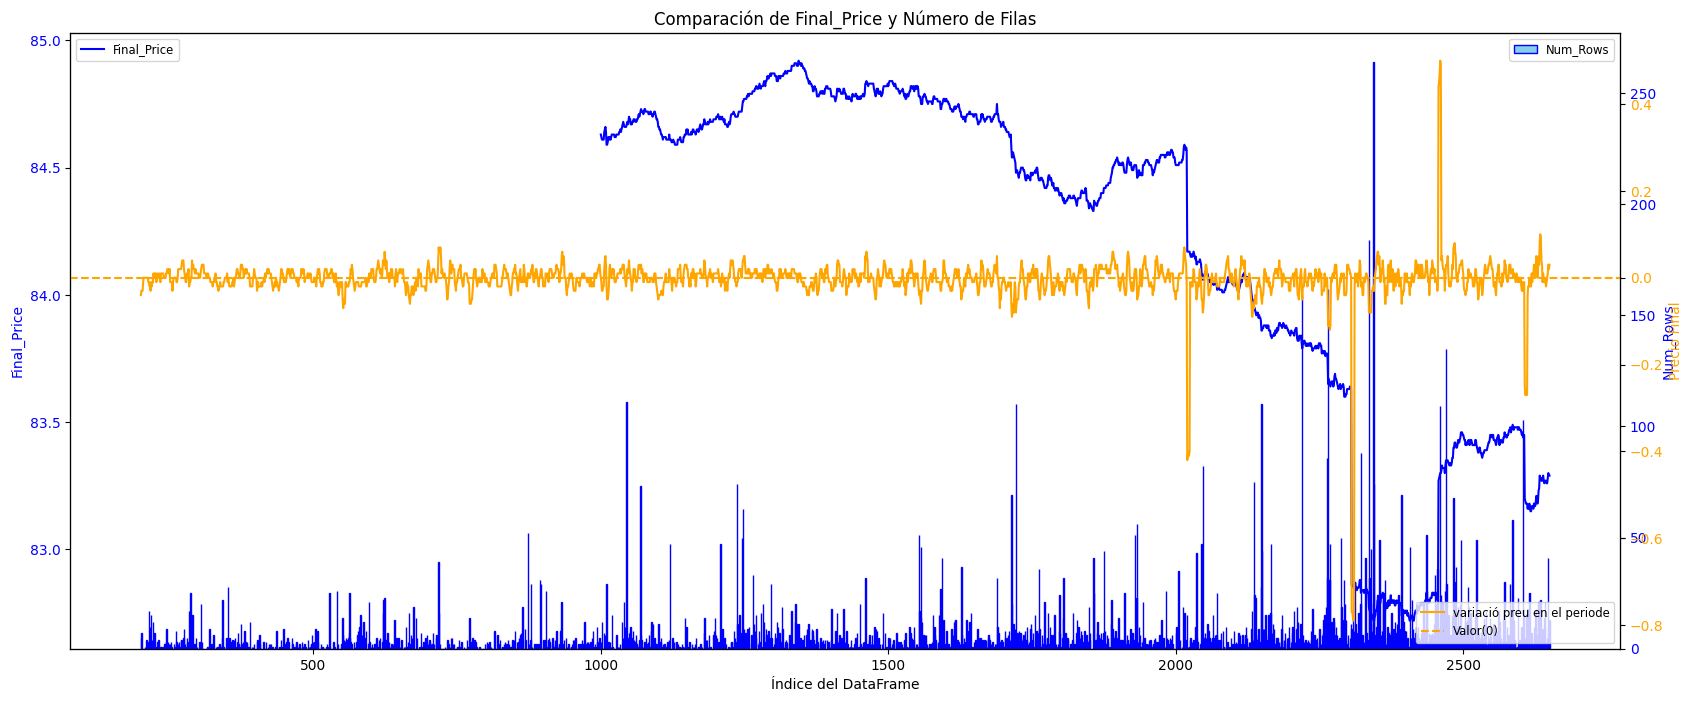

In [67]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
fig, ax1 = plt.subplots(figsize=(20, 8))

# Limitar el DataFrame a las filas del índice 1000 al 1150
df_segment = df_aggregate.iloc[1000:2651]

# Crear un gráfico de líneas para 'Final_Price' en el primer eje (eje Y izquierdo)
ax1.plot(df_segment.index, df_segment['Final_Price'], color='blue', label='Final_Price', linestyle='-')
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Final_Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Comparación de Final_Price y Número de Filas')

# Crear un segundo eje Y para 'Num_Rows' en el segundo eje (eje Y derecho)
ax2 = ax1.twinx()
ax2.bar(df_aggregate_selection.index, df_aggregate_selection['Num_Rows'], color='skyblue', edgecolor='b', label='Num_Rows')
ax2.set_ylabel('Num_Rows', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Crear un tercer eje Y para 'impulso' en el segundo eje (eje Y derecho)
ax3 = ax1.twinx()
ax3.plot(df_aggregate_selection.index, df_aggregate_selection['impulso'], color='orange', label='variació preu en el periode')
ax3.set_ylabel('Precio Final', color='orange')
ax3.tick_params(axis='y', labelcolor='orange')

# valor 0
horizontal_line_value = 0  
ax3.axhline(y=horizontal_line_value, color='orange', linestyle='--', label=f'Valor({horizontal_line_value})')

# Añadir leyendas para los ejes Y
ax1.legend(loc='upper left', fontsize='small')
ax2.legend(loc='upper right', fontsize='small')
ax3.legend(loc='lower right', fontsize='small')

plt.show()

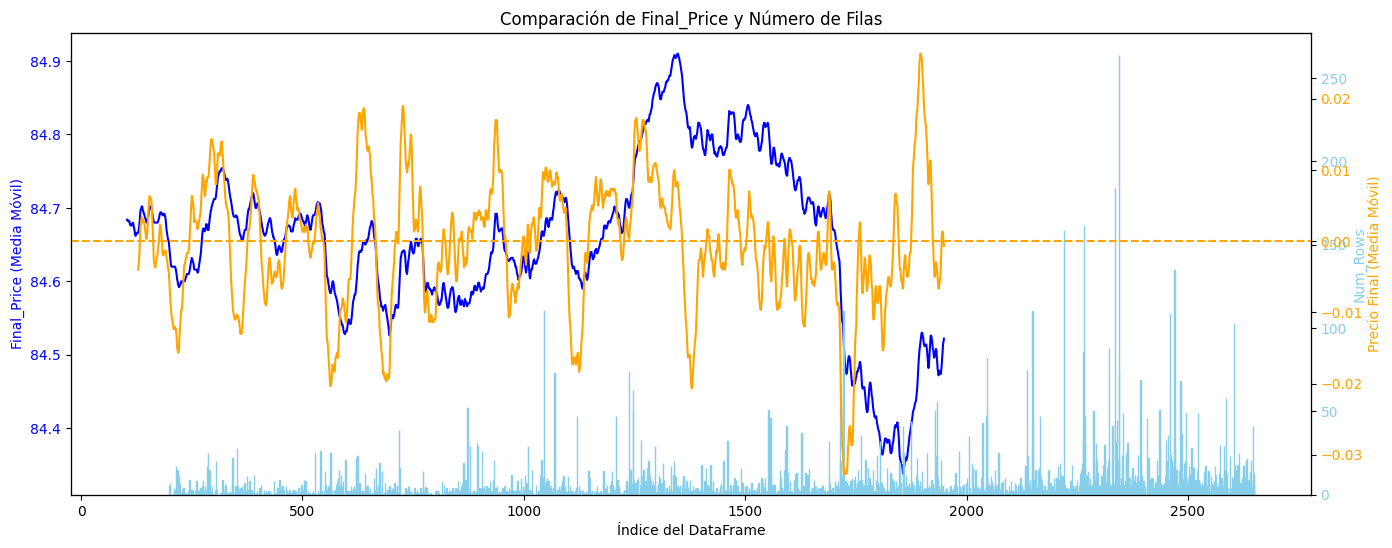

In [113]:
# MÈTODE 6: VEURE SI UNA VARIACIÓ ACUMULADA DEL PREU ES UN SENYAL ADELANTAT DEL MOVIMENT DEL PREU

# Crear una figura y ejes
fig, ax1 = plt.subplots(figsize=(16, 6))

# Limitar el DataFrame a las filas del índice 1000 al 1250
df_segment = df_aggregate.iloc[100:1950]

# Calcular la media móvil de 5 períodos para 'Final_Price' (línea azul)
final_price_ma = df_segment['Final_Price'].rolling(window=5).mean()

# Crear un gráfico de líneas para 'Final_Price' en el primer eje (eje Y izquierdo)
ax1.plot(df_segment.index, final_price_ma, color='blue', label='Final_Price (Media Móvil)', linestyle='-')
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Final_Price (Media Móvil)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Comparación de Final_Price y Número de Filas')

# Crear un segundo eje Y para 'Num_Rows' en el segundo eje (eje Y derecho)
ax2 = ax1.twinx()
ax2.bar(df_aggregate_selection.index, df_aggregate_selection['Num_Rows'], color='skyblue', edgecolor='skyblue', label='Num_Rows')
ax2.set_ylabel('Num_Rows', color='skyblue')
ax2.tick_params(axis='y', labelcolor='skyblue')

# Calcular la media móvil de 12 períodos para 'impulso' (línea naranja)
impulso_ma = df_segment['impulso'].rolling(window=30).mean()

# Crear un tercer eje Y para 'impulso' en el segundo eje (eje Y derecho)
ax3 = ax1.twinx()
ax3.plot(df_segment.index, impulso_ma, color='orange', label='variació preu en el periode (Media Móvil)')
ax3.set_ylabel('Precio Final (Media Móvil)', color='orange')
ax3.tick_params(axis='y', labelcolor='orange')

# valor 0
horizontal_line_value = 0  
ax3.axhline(y=horizontal_line_value, color='orange', linestyle='--', label=f'Valor({horizontal_line_value})')

plt.show()

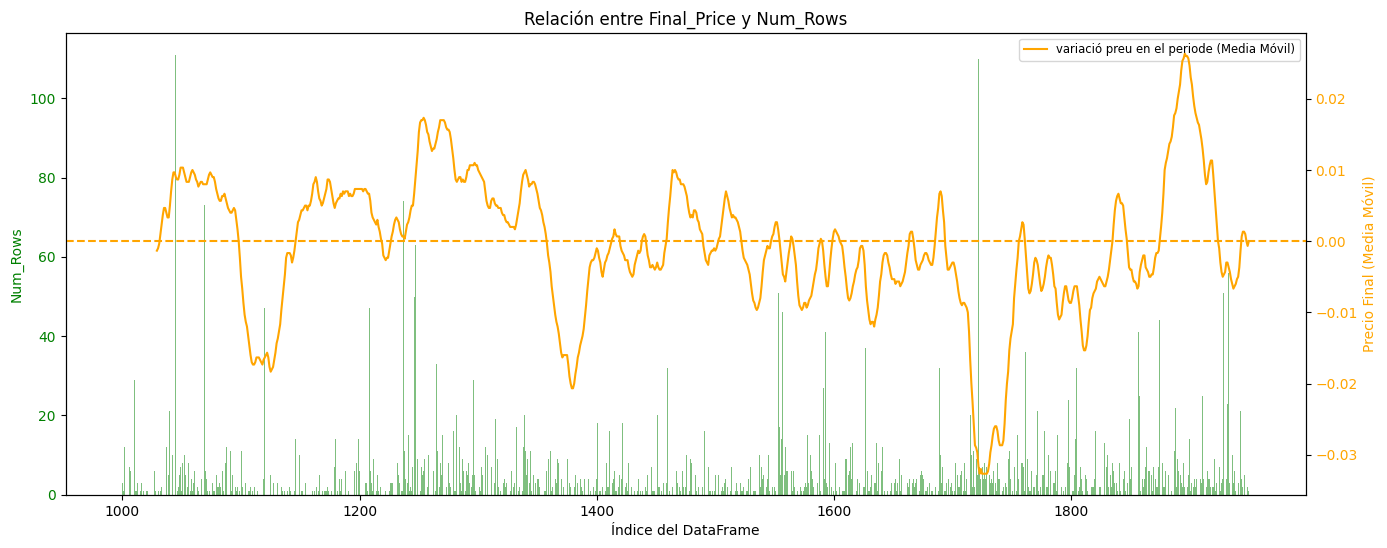

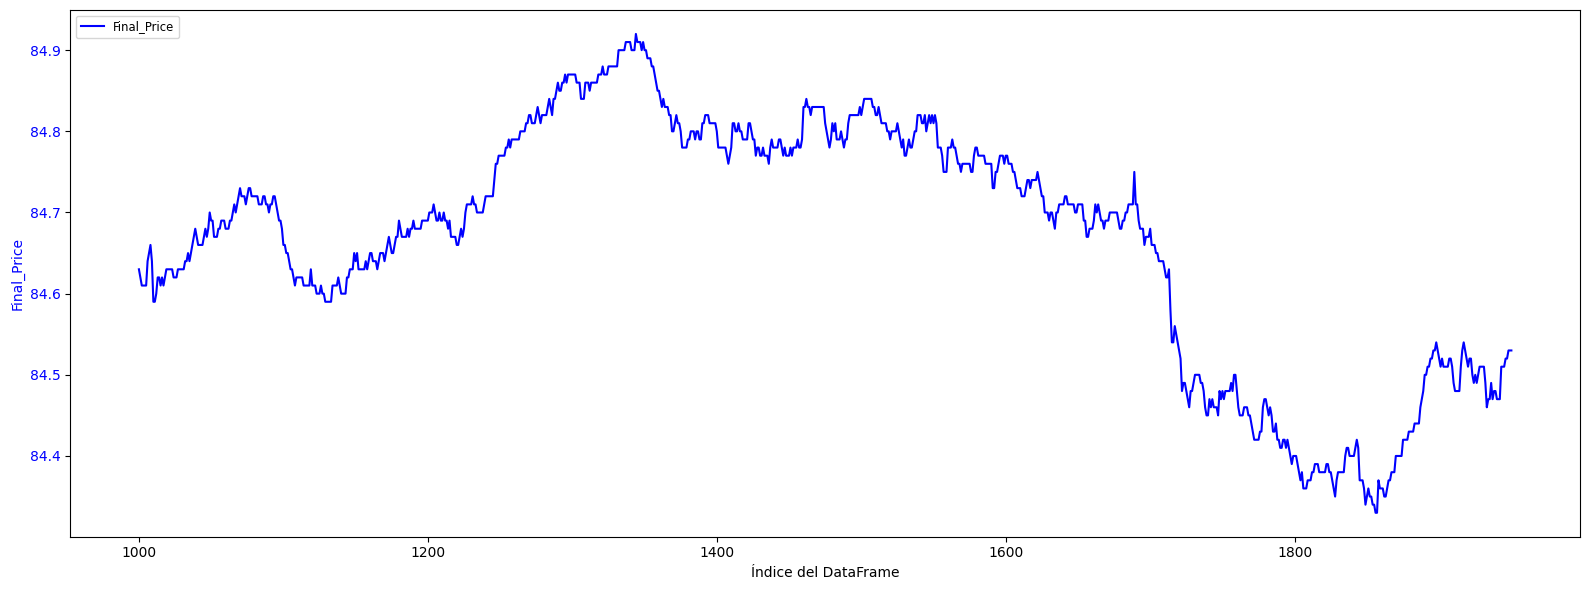

In [124]:
from matplotlib.lines import Line2D  # Importar Line2D para crear una línea vacía

# Crear una figura y ejes para el primer gráfico (arriba)
fig, ax1 = plt.subplots(figsize=(16, 6))

# Limitar el DataFrame a las filas del índice 1000 al 1950
df_segment = df_aggregate.iloc[1000:1951]

# Calcular la media móvil de 5 períodos para 'Final_Price' (línea azul)
final_price_ma = df_segment['Final_Price'].rolling(window=5).mean()

# Crear un gráfico de líneas para 'Final_Price' en el primer eje (eje Y izquierdo)
line1 = ax1.plot(df_segment.index, final_price_ma, color='blue', label='Final_Price (Media Móvil)', linestyle='-')[0]
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Final_Price (Media Móvil)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Relación entre Final_Price y Num_Rows')

# Trazar 'Num_Rows' en el mismo eje Y que 'Final_Price' como barras en color verde
ax1.bar(df_segment.index, df_segment['Num_Rows'], color='green', label='Num_Rows', alpha=0.5)
ax1.set_ylabel('Num_Rows', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Calcular la media móvil de 12 períodos para 'impulso' (línea naranja)
impulso_ma = df_segment['impulso'].rolling(window=30).mean()

# Crear un tercer eje Y para 'impulso' en el segundo eje (eje Y derecho)
ax2 = ax1.twinx()
line2 = ax2.plot(df_segment.index, impulso_ma, color='orange', label='variació preu en el periode (Media Móvil)')[0]
ax2.set_ylabel('Precio Final (Media Móvil)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# valor 0
horizontal_line_value = 0  
ax2.axhline(y=horizontal_line_value, color='orange', linestyle='--', label=f'Valor({horizontal_line_value})')

# Añadir leyendas y asignar líneas vacías a line1 y line2
ax1.legend(handles=[line2], loc='upper right', fontsize='small')  # Solo mostrar la leyenda de line2 (naranja)
line1.set_visible(False)  # Ocultar la línea azul

# Crear un segundo gráfico (abajo) para 'Final_Price' en color azul
fig, ax3 = plt.subplots(figsize=(16, 6))
ax3.plot(df_segment.index, df_segment['Final_Price'], color='blue', label='Final_Price', linestyle='-')
ax3.set_xlabel('Índice del DataFrame')
ax3.set_ylabel('Final_Price', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.legend(loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

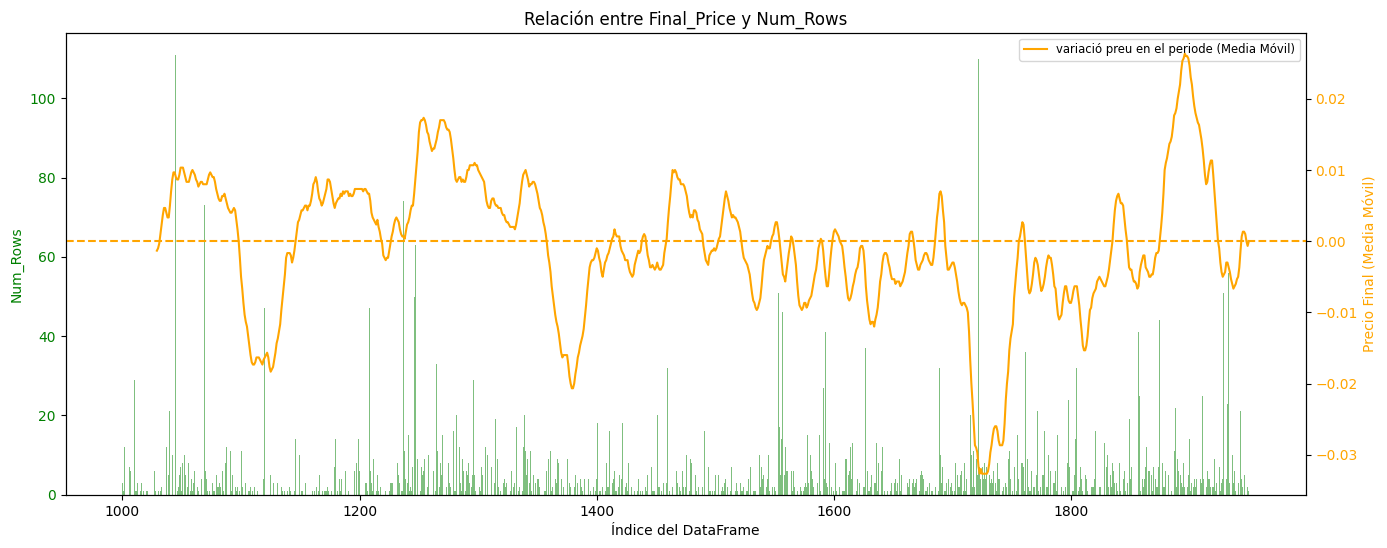

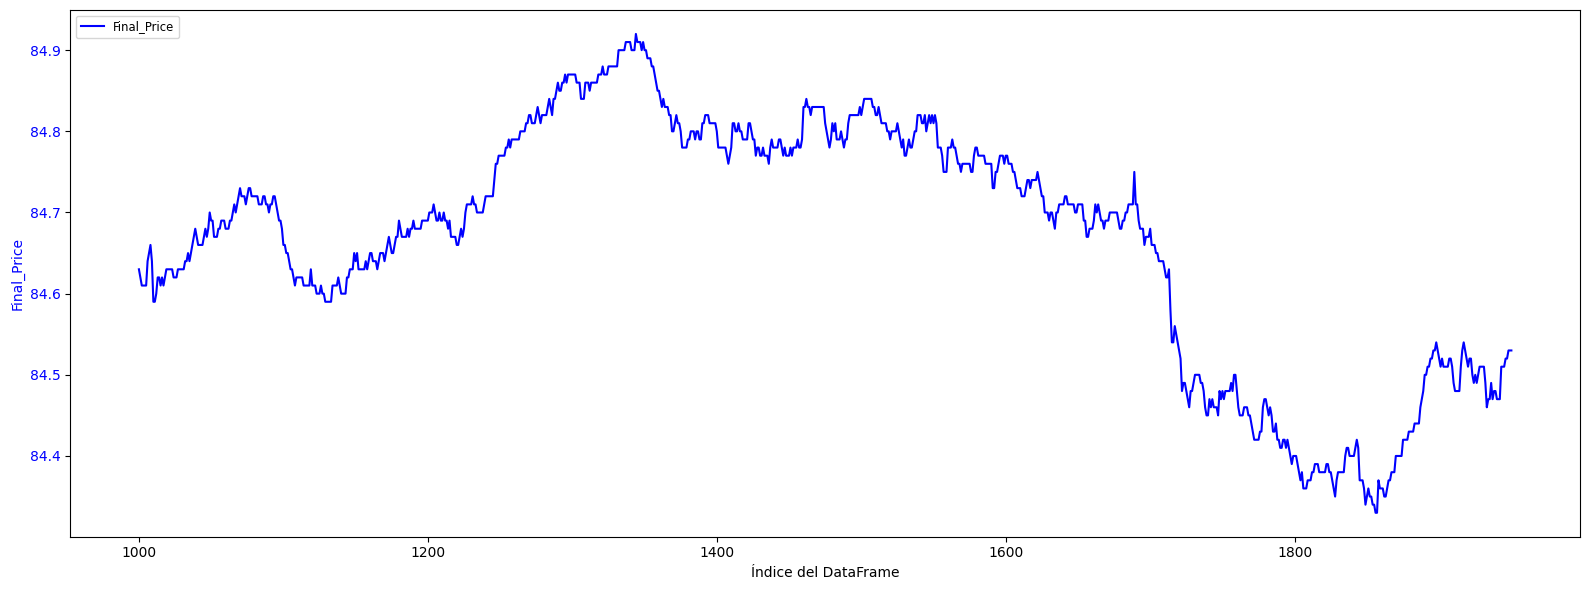

In [132]:
from matplotlib.lines import Line2D  

fig, ax1 = plt.subplots(figsize=(16, 6))

# Limitar el DataFrame a las filas del índice 1000 al 1950
df_segment = df_aggregate.iloc[1000:1951]

# Calcular la media móvil de 5 períodos para 'Final_Price' (línea azul)
final_price_ma = df_segment['Final_Price'].rolling(window=5).mean()

# Crear un gráfico de líneas para 'Final_Price' en el primer eje (eje Y izquierdo)
line1 = ax1.plot(df_segment.index, final_price_ma, color='blue', label='Final_Price (Media Móvil)', linestyle='-')[0]
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Final_Price (Media Móvil)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Relación entre Final_Price y Num_Rows')

# Trazar 'Num_Rows' en el mismo eje Y que 'Final_Price' como barras en color verde
ax1.bar(df_segment.index, df_segment['Num_Rows'], color='green', label='Num_Rows', alpha=0.5)
ax1.set_ylabel('Num_Rows', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Calcular la media móvil de 12 períodos para 'impulso' (línea naranja)
impulso_ma = df_segment['impulso'].rolling(window=30).mean()

# Crear un tercer eje Y para 'impulso' en el segundo eje (eje Y derecho)
ax2 = ax1.twinx()
line2 = ax2.plot(df_segment.index, impulso_ma, color='orange', label='variació preu en el periode (Media Móvil)')[0]
ax2.set_ylabel('Precio Final (Media Móvil)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# valor 0
horizontal_line_value = 0  
ax2.axhline(y=horizontal_line_value, color='orange', linestyle='--', label=f'Valor({horizontal_line_value})')

# Añadir leyendas y asignar líneas vacías a line1 y line2
ax1.legend(handles=[line2], loc='upper right', fontsize='small')  # Solo mostrar la leyenda de line2 (naranja)
line1.set_visible(False)  # Ocultar la línea azul

# Crear un segundo gráfico (abajo) para 'Final_Price' en color azul
fig, ax3 = plt.subplots(figsize=(16, 6))
ax3.plot(df_segment.index, df_segment['Final_Price'], color='blue', label='Final_Price', linestyle='-')
ax3.set_xlabel('Índice del DataFrame')
ax3.set_ylabel('Final_Price', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.legend(loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

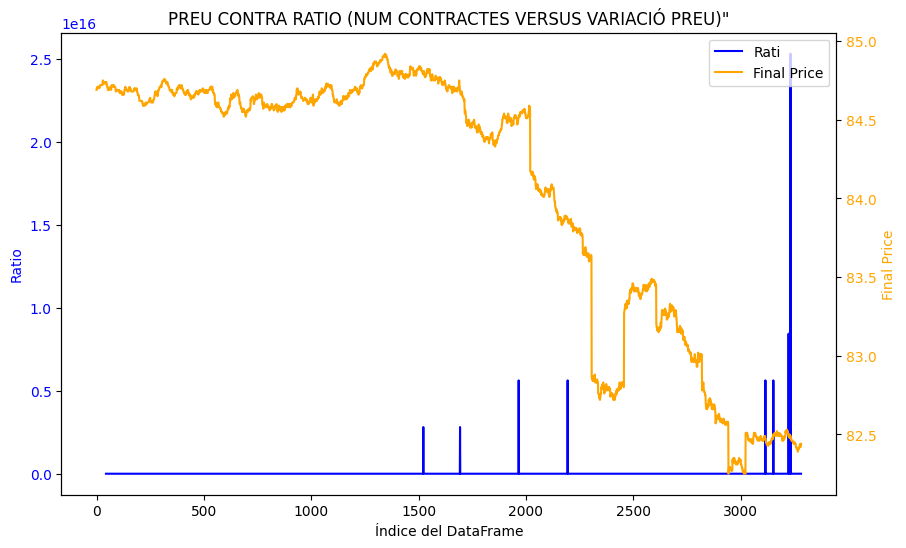

In [140]:
# MAPA GENERAL DEL RATI I EL PREU
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df_aggregate.index, df_aggregate['ratio'], color='blue', linestyle='-', label='Rati')
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Ratio', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


# Crear un segón eix
ax2 = ax1.twinx()
ax2.plot(df_aggregate.index, df_aggregate['Final_Price'], color='orange', linestyle='-', label='Final Price')
ax2.set_ylabel('Final Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Llegendes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper right')

plt.title('PREU CONTRA RATIO (NUM CONTRACTES VERSUS VARIACIÓ PREU)"')
plt.show()


In [136]:
# Crea un CSV i el gurada al directori Output
df.to_csv(ruta_Output, index=False)
df_aggregate.to_csv(ruta_Output1, index=False)